<a href="https://colab.research.google.com/github/Michu791/habiali/blob/main/mipago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [36]:
#relacion de salario y horas trabajadas salario=15.72hora+5
hora= np.array([0,1,2,3,4,5,6,7,8,9,10],dtype=np.float32).reshape(-1,1)
salario= np.array([5,20.72,36.44,52.16,67.88,83.6,99.32,115.04,130.76,146.48,162.2],dtype=np.float32)

In [44]:
modelo= tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
modelo.compile(optimizer="sgd", loss="mean_squared_error")
modelo.fit(hora, salario, epochs=500, verbose=0)

In [38]:
salarion = modelo.predict(np.array([[10]], dtype=np.float32), verbose=0).item()
print(f"Predicción para 10 h: {salarion:.2f}")

Predicción para 10 h: 162.61


In [39]:
w, b = modelo.layers[0].get_weights()
print(f"Recta aprendida: salario = {w[0][0]:.5f} * horas + {b[0]:.5f}")

Recta aprendida: salario = 15.85276 * horas + 4.07813


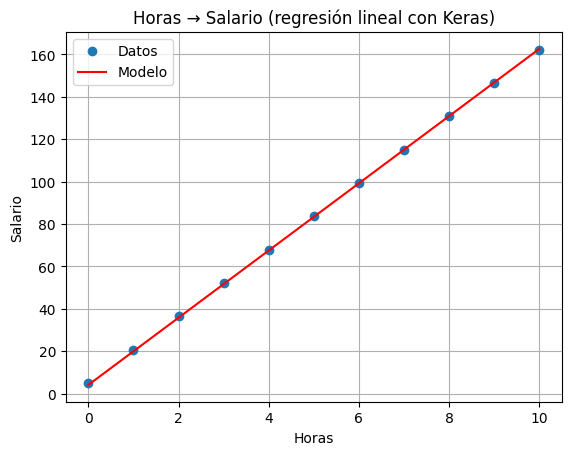

In [40]:
horan = np.linspace(hora.min(), hora.max(), 100, dtype=np.float32).reshape(-1,1)
salarion_line = modelo.predict(horan, verbose=0).ravel()
plt.figure()
plt.plot(hora.ravel(), salario, "o", label="Datos")
plt.plot(horan.ravel(), salarion_line, "-r", label="Modelo")
plt.xlabel("Horas"); plt.ylabel("Salario")
plt.title("Horas → Salario (regresión lineal con Keras)")
plt.grid(True); plt.legend(); plt.show()

In [43]:
h = float(input("Ingresa horas: "))
pred = modelo.predict(np.array([[h]], dtype=np.float32), verbose=0).item()
print(f"Salario predicho para {h:.2f} h: {pred:.2f}")

Ingresa horas: 0
Salario predicho para 0.00 h: 4.08
